# Takehome Assesment - Rohan Vartak

### Tools Used

For this analysis I have made use of pandas and SQL. I have used pandas to read the csv files and then used SQL using pandasql library to do analysis. The primary reason for using SQL instead of pandas directly is that I am more familiar with SQL and I use it in my day to day work and therefore it helped me speed up my work. For visualizing the data I have made use of seaborn library for quick visualizations.

### Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandasql as psql

In [3]:
df = pd.read_csv('takehome_data.csv')
df.head()

,client_timestamp,id_user,id_doc,event_type,event_detail,event_detail_name,doc_type,client_url
0,2017-08-11 14:14:53.691,3,54,navigate,NaN,NaN,User Doc,/d
1,2017-08-11 14:14:53.837,3,54,storageUsage,NaN,NaN,User Doc,/d
2,2017-08-11 14:14:54.329,3,54,loadDocument,NaN,NaN,User Doc,/d
3,2017-08-11 19:32:51.151,3,54,navigate,NaN,NaN,User Doc,/d
4,2017-08-11 19:32:51.231,3,54,loadDocument,NaN,NaN,User Doc,/d


adding a new column for date, which is extracted from the timestamp column

In [4]:
df1 = psql.sqldf("select client_timestamp, substr(client_timestamp, 1, 10) as date, id_user as userid, id_doc as docid, event_type, event_detail, event_detail_name, doc_type, client_url from df;", globals())

In [5]:
df1.head()

,client_timestamp,date,userid,docid,event_type,event_detail,event_detail_name,doc_type,client_url
0,2017-08-11 14:14:53.691,2017-08-11,3,54,navigate,None,None,User Doc,/d
1,2017-08-11 14:14:53.837,2017-08-11,3,54,storageUsage,None,None,User Doc,/d
2,2017-08-11 14:14:54.329,2017-08-11,3,54,loadDocument,None,None,User Doc,/d
3,2017-08-11 19:32:51.151,2017-08-11,3,54,navigate,None,None,User Doc,/d
4,2017-08-11 19:32:51.231,2017-08-11,3,54,loadDocument,None,None,User Doc,/d


For inital analysis looking at how many distinct users have used coda per month.

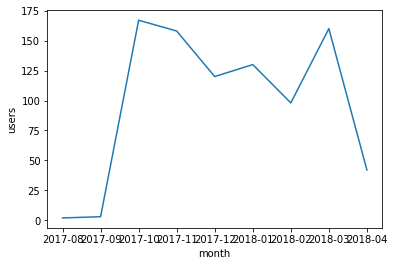

In [7]:
a = psql.sqldf("select substr(date, 1, 7) as month, count(distinct(userid)) as users from df1 group by 1;", globals())
sns.lineplot(data=a, x='month', y='users')

Also looking at the number of documents which have event logs per month

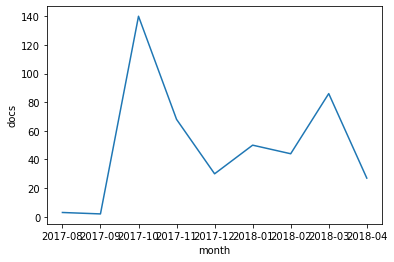

In [8]:
b = psql.sqldf("select substr(date, 1, 7) as month, count(distinct(docid)) as docs from df1 group by 1;", globals())
sns.lineplot(data=b, x='month', y='docs')

There is no particular pattern in the monthly users or documents

Looking at the actual events, seeing the counts of each events

In [10]:
print(psql.sqldf("select event_type, count(*) as count from df1 group by 1 order by 2 desc;", globals()))

                      event_type   count
0            applyLocalOperation  338378
1                       navigate    5637
2                   storageUsage    5323
3                   loadDocument    5070
4                      mouseDown    4988
5              viewDefaultValues    2509
6          tutorialStepCompleted    2413
7            tutorialStepStarted    2165
8                     addFormula    1283
9               documentSearched    1254
10                         click     771
11                    addSection     735
12                 confirmDelete     631
13                       addGrid     501
14         resolver/invalidation     448
15                addLinkedTable     342
16                renameDocument     229
17            experimentExposure     219
18              externalNavigate     175
19              addSectionFolder     166
20                      addImage     122
21                    autoReload      81
22             tutorialCompleted      68
23              

From above we see that 
- Application of Local Operation is the most frequent event. It will be good to do further analysis on the type of operations used by the users.
- Events related to navigation and loading/opening of documents are also more common. This is understandable since the users will be opening and navigating to various documents.
- There is also add events such as addFormula, addSection. These event can be compared to see what kind of addtions the use are adding to their docs.
- Other events seem to be less frequent so I will not focus on them for this analysis

#### For the next step I will first try to understand the usage pattern for these users 

In [11]:
q = psql.sqldf("select userid, count(*) as count from df1 group by 1 order by 2 desc;", globals())

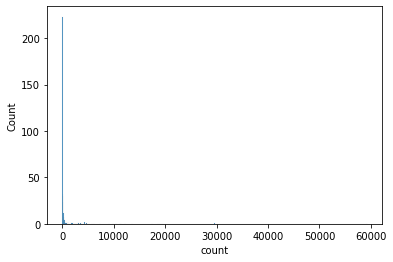

In [14]:
sns.histplot(data=q, x='count')

Looking at the first 15 users who have most events

In [15]:
q.head(15)

,userid,count
0,167,59198
1,102,29578
2,38,19420
3,186,18944
4,34,18571
5,4,17478
6,17,13583
7,265,12223
8,162,11473
9,218,11142


Looking at the last 15 users who have least number of events

In [16]:
q.tail(15)

,userid,count
394,220,3
395,219,3
396,217,3
397,192,3
398,190,3
399,189,3
400,188,3
401,185,3
402,182,3
403,177,3


**There seems to be a highly skewed distibution of event count among the users, with a few users who are power users and have heavy usage while a considerable number of users just open the docs to possible just read them without editing them or making changes to them.**

Looking at events logs 1 particular user

In [17]:
print(psql.sqldf("select * from df1 where date = '2017-12-19' and userid = 245  and docid = 155 order by 1;", globals()))

           client_timestamp        date  userid  docid           event_type  \
0   2017-12-19 09:33:25.936  2017-12-19     245    155         loadDocument   
1   2017-12-19 09:33:26.454  2017-12-19     245    155             navigate   
2   2017-12-19 09:33:26.589  2017-12-19     245    155         storageUsage   
3   2017-12-19 13:18:57.002  2017-12-19     245    155         storageUsage   
4    2017-12-19 13:18:57.75  2017-12-19     245    155         loadDocument   
5   2017-12-19 13:18:58.588  2017-12-19     245    155             navigate   
6   2017-12-19 13:29:43.575  2017-12-19     245    155  applyLocalOperation   
7   2017-12-19 13:36:56.043  2017-12-19     245    155         loadDocument   
8    2017-12-19 13:36:56.32  2017-12-19     245    155             navigate   
9   2017-12-19 13:36:56.415  2017-12-19     245    155         storageUsage   
10  2017-12-19 13:38:22.651  2017-12-19     245    155  applyLocalOperation   
11  2017-12-19 13:39:04.961  2017-12-19     245    1

From above we can see a user navigates to the doc and edits it. This seems to be the pattern for most other users who are editing the docs. 

For the next part I want to compare how many different docs do users edit and how frequently do they edit a doc

The below query calculates the number of distinct users per doc and the number of distinct days it has events for

In [18]:
x = psql.sqldf("select docid, count(*) as events, count(distinct(userid)) as user_count, count(distinct(date)) as date_count from df1 group by 1 order by 2 desc;", globals())

In [19]:
x.head(10)

,docid,events,user_count,date_count
0,88,73384,156,168
1,207,50231,1,91
2,225,30112,7,24
3,168,21006,34,71
4,90,18906,1,12
5,138,13586,2,34
6,263,12864,49,78
7,252,12475,13,41
8,12,10348,2,48
9,246,9724,13,19


In [20]:
x.tail(10)

,docid,events,user_count,date_count
304,68,4,1,1
305,66,4,1,1
306,59,4,1,1
307,47,4,1,1
308,36,4,1,1
309,35,4,1,1
310,2,4,1,1
311,186,3,1,1
312,43,3,1,1
313,72,2,1,1


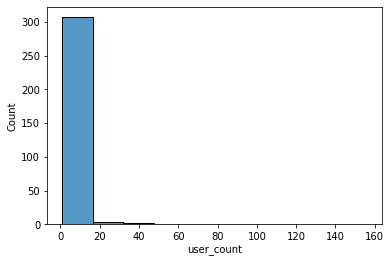

In [21]:
sns.histplot(data=x, x='user_count')

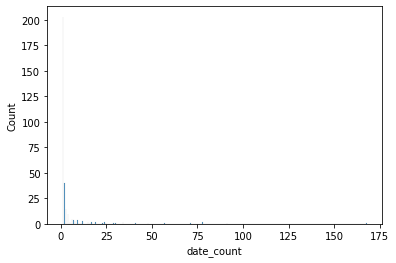

In [22]:
sns.histplot(data=x, x='date_count')

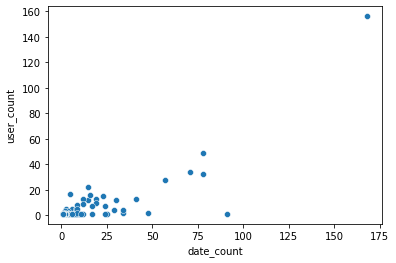

In [23]:
sns.scatterplot(data=x, x='date_count', y='user_count')

**From the above there is pattern where some of the docs seem to be shared docs, and are used by multiple users over multiple days. Majority of the docs still seem to be used by a single users and possible for a few days. This mostly indiciates that users are using coda to take notes for different topics or simply using a new doc to new topic/report. Also majority of the usage is single user usage, which could indicate that coda is still being used in this company as a notes taking tool, but not as a information sharing tool.**

#### Now focusing on the add event to see what is being added by the users 

In [25]:
print(psql.sqldf("select event_type, count(*) as event_count, count(distinct(docid)) as doc_count from df1 where event_type like 'add%' group by 1 order by 2 desc;", globals()))

         event_type  event_count  doc_count
0        addFormula         1283         56
1        addSection          735         88
2           addGrid          501        158
3    addLinkedTable          342        119
4  addSectionFolder          166         41
5          addImage          122         22
6  addCommentThread           52         21


**Most of the additions seem to be for Formula, followed by section and grid. Addition of linked tables is also popular. From this it seems users are making use of Formulas and linked tables to do automatic updates and calculations and also sharing the tables across multiple docs. Tables seems to be a important use case for these sets of users.**

### Now looking at the event details for applyLocalOperation

In [26]:
print(psql.sqldf("select event_detail, event_detail_name, count(*) as event_count, count(distinct(docid)) as doc_count, count(distinct(userid)) as user_count from df1 where event_type = 'applyLocalOperation' group by 1, 2 order by 3 desc;", globals()))

   event_detail                       event_detail_name  event_count  \
0           SPL                           SPLICE_STRING       252692   
1           RBM                   BULK_MODIFY_ROW_VALUE        28434   
2           BRA                            BULK_ADD_ROW         6723   
3           VPR                       SET_VIEW_PROPERTY         4348   
4            CW                     CHANGE_COLUMN_WIDTH         4306   
5           CVF              MODIFY_COLUMN_VALUE_FORMAT         4287   
6            CC                           CREATE_COLUMN         3501   
7           RUL                     RANGES_UPDATE_LINES         3012   
8            CS                             SHOW_COLUMN         2576   
9            CN                           RENAME_COLUMN         2350   
10          CON                             CHANGE_NAME         2179   
11         CVPR                SET_COLUMN_VIEW_PROPERTY         1843   
12           CF                   CHANGE_COLUMN_FORMULA         

**From above we can see that the majority of the operations are for splicing of strings. I am assuming this is addition of different paragraphs of text.
The next set of operations seem to be related to tables like BULK_MODIFY_ROW_VALUE, BULK_ADD_ROW, CHANGE_COLUMN_WIDTH. This indicates heavy usage of tables inside of docs by these particular set of users.**

## Recommendations

- For these particular users the since the usage pattern is skewed with a significant number of users not necessarily using all the features of the doc but just using it to read information, the team can focus on user acquisition by getting the users more aware about the different features that are present in coda and getting users to create docs.

- Since majority of users are using single doc per day, we can further investigate why is this so. 
    - One of the reasons could be the separation of information and hence more docs are created per separate topic. The team can then invest into features better organization for docs by topics/folders which can allow to the users to easily handle large volume of docs 
    - Another reason could be that coda is still used as personalized notes taking/book keeping tool in this company. Here the team can focus on customer education with respect to how Coda can be used in information sharing/presentations and build better features for the same.
    
- Formulas inside of Coda along with linked tables seems like a popular use case with this set of customers. The team can focus on more automated formulas, and formula shortcuts to further support this use case.

- Another popular use case is that of tables. The team should focus on easy of use with respect to tables and better editing capabilities for tables and most of the operations seem focused on table editing.
    